In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from nltk.corpus import reuters
from sklearn.feature_extraction import text
%matplotlib inline

In [35]:
# Data import curtesy Conner
# How it works: For each file id in the nltk reuters corpus,
# get the words in that file and separate them by spaces and 
# make them lower case. This yields an array of text documents
X = np.array([" ".join(list(reuters.words(file_id))).lower()
              for file_id in reuters.fileids()])

# Convert to sparse matrix of s where a row is a document's frequency vector
tfidf = text.TfidfVectorizer()
X = tfidf.fit_transform(X)

# get labels
labels = np.array(tfidf.get_feature_names())

In [38]:
def objective(V, W, h):
    """
    Frobenius norm of V - WH
    """
    return np.linalg.norm(v - w @ h, ord = 'fro')

def matrix_decompose(V, k, iters):
    W = np.abs(np.random.randn(V.shape[0], k))
    H = np.abs(np.random.randn(k, V.shape[1]))
    
    objectives = [objective(V, W, H)]
    for i in range(iters):
        Wc = W.copy()
        W *= (V @ H.T) / (W @ (H @ H.T))
        H *= (Wc.T @ V) / (Wc.T @ Wc @ H)
              
        obj = objective(V, W, H)
        if i % (iters/5) == 0:
            print(obj)
        objectives.append(obj)
        
    return W, H, objectives

In [39]:
W,H,objs = matrix_decompose(X, 20, 5)

103.865199957
1753238.90568
103.865173906
1999813.86736
103.865116653


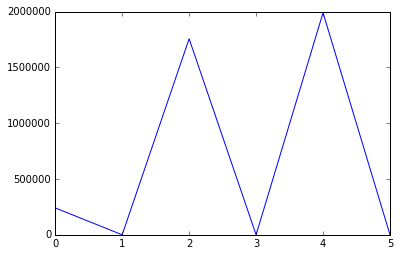

In [28]:
# plot objective
plt.plot(objs)

In [139]:
top_words = np.array(tfidf.get_feature_names())[
            np.argpartition(H, axis=1, kth = -5)]

print(top_words[:,-5:])

[['net' 'dlrs' 'loss' '000' 'vs']
 ['said' 'cts' 'in' 'the' 'of']
 ['dlrs' 'loss' 'vs' '000' 'net']
 ['lt' 'mln' 'net' 'vs' 'cts']
 ['said' 'in' 'to' 'mln' 'and']
 ['in' 'the' 'said' 'of' 'to']
 ['and' 'year' 'the' 'to' 'in']
 ['mln' 'from' 'in' 'to' 'the']
 ['on' 'in' 'the' 'of' 'said']
 ['pct' 'in' 'to' 'and' 'mln']
 ['to' 'its' 'dlrs' 'the' 'for']
 ['in' 'for' 'said' 'of' 'it']
 ['of' 'vs' 'mln' 'profit' '000']
 ['of' 'dlrs' 'cts' 'net' 'shr']
 ['shr' 'qtr' 'vs' 'mln' 'cts']
 ['shr' 'to' 'vs' 'in' 'billion']
 ['revs' 'loss' 'net' 'mln' '000']
 ['revs' 'vs' 'net' 'mln' 'loss']
 ['and' 'vs' 'the' 'of' '000']
 ['shr' 'mln' 'vs' 'cts' 'the']]
